In [5]:
from valder import *
import matplotlib.pyplot as plt
import seaborn as sns
from latexify import *
%matplotlib inline


In [6]:
x = valder(3, 1)
print(x)
print(x+x)
print(np.sin(x))
print(x*x)
print(np.sin(x*x)*x)
print(x+2)
print(2+x)
print("!!!")
print(x**2)
print(2**x)
y = valder(4, 1)
print(x/y)


val: 3, der: [1]
val: 6, der: [2]
val: 0.1411200080598672, der: [-0.9899925]
val: 9, der: [6]
val: 1.2363554557252698, der: [-15.98822623]
val: 5, der: [1]
val: 5, der: [1]
!!!
val: 9, der: [6]
val: 8, der: [5.54517744]
val: 0.75, der: [0.0625]


In [164]:
"""A simple function"""
def f(x):
    return np.exp(-np.sqrt(x))*np.sin(x*np.log(1+x*x))

def fdf(a, f):
    """Takes an array and creates a numpy array of
    values of f and their derivatives"""
    y = []
    for i in a:
        x = valder(i, 1)
        y.append(f(x))
    return np.asarray(y)
x = np.arange(0, 5, 0.01)
y = fdf(x, f)


C:\Users\polyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:265: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\polyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\polyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


Setting figsize to 5.47293 x 3.382456758048962


<Figure size 394.051x243.537 with 0 Axes>

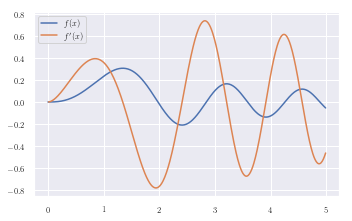

In [165]:
fig, ax = setup(True, 16, 10)
plt.plot(x, valderlist_to_2d(y)[:,0], label=r"$f(x)$")
plt.plot(x, valderlist_to_2d(y)[:,1], label=r"$f'(x)$")
plt.legend()

Setting figsize to 5.47293 x 3.382456758048962


<Figure size 394.051x243.537 with 0 Axes>

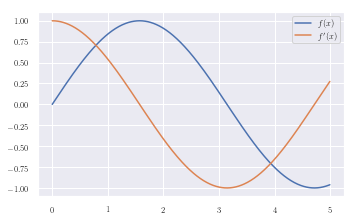

In [166]:
"""Even simpler"""
y = fdf(x, np.sin)
fig, ax = setup(True, 16, 10)
plt.plot(x, valderlist_to_2d(y)[:,0], label=r"$f(x)$")
plt.plot(x, valderlist_to_2d(y)[:,1], label=r"$f'(x)$")
plt.legend()

In [200]:
def newtonvalder(x, f, eps=0.00001):
    """Newton methond with valder object x as seed"""
    delta = 1
    while np.max(np.abs(delta)) > eps:
        y = f(x)
        delta = y.val/y.der.flatten("K")
        x = x - delta
    return x
print(newtonvalder(valder(3, 1), np.sin))
print(newtonvalder(valder(5, 1), f))

val: [3.14159265], der: [1]
val: [4.88705597], der: [1]


In [201]:
"""Multivariable Gradients"""
def f2(angle, velocity, height):
    serve = (velocity*np.cos(angle))**2/32 * (
            np.tan(angle) + np.sqrt(
                np.tan(angle)**2 
                + 64*height/(velocity*np.cos(angle))**2)) 
    serve.der = serve.der.flatten("K")
    serve.der[0] *= np.pi/180
    return serve

print(f2(valder(20*np.pi/180, [1, 0, 0]),
     valder(44, [0, 1, 0]),
     valder(9, [0, 0, 1])))

val: 56.04614183495665, der: [1.07170257 1.95045586 1.45956811]


In [300]:
"""Jacobians can now be calculated and used to solve nonlinear equations"""

def newton_multi_dim(x, f, eps=0.00001, maxiter=1000):
    """Newton methond with valder object x as seed"""
    delta = 1
    iteri = 1
    while np.max(np.abs(delta)) > eps and iteri<maxiter:
        iteri = iteri+1
        v, J = f(x)
        # Solve Jx=v for x
        delta = np.linalg.solve(J, v)
        x = (x - delta).flatten("K")
    return x

def g1(x, y, z):
    return 3*x-np.cos(y*z)-0.5

def g2(x, y, z):
    return x*x-81*(y+0.1)**2+np.sin(z)+1.06

def g3(x, y, z):
    return np.exp(-x*y)+20*z+(10*np.pi-3)/3

def gjf_seed(seed):
    x = valder(seed[0], [1, 0, 0])
    y = valder(seed[1], [0, 1, 0])
    z = valder(seed[2], [0, 0, 1])
    f1 = g1(x, y, z)
    f2 = g2(x, y, z)
    f3 = g3(x, y, z)
    return np.asarray([f1, f2, f3])

def gjf(v):
    x = v[0]
    x.der = np.asarray([1, 0, 0])
    y = v[1]
    y.der = np.asarray([0, 1, 0])
    z = v[2]
    z.der = np.asarray([0, 0, 1])
    f1 = g1(x, y, z)
    f2 = g2(x, y, z)
    f3 = g3(x, y, z)
    v = np.asarray([f1.val, f2.val, f3.val])
    J = np.asarray([f1.der.flatten("K"), 
                    f2.der.flatten("K"),
                    f3.der.flatten("K")])
    return v, J
print("Good seeds are crucial here")
print("A solution")
sol = newton_multi_dim(gjf_seed([.1, .1, -.1]), gjf)
print(sol)
print(g1(sol[0].val, sol[1].val, sol[2].val), 
      g2(sol[0].val, sol[1].val, sol[2].val),
      g3(sol[0].val, sol[1].val, sol[2].val))
print("Another solution")
sol = newton_multi_dim(gjf_seed([1, 1, -1]), gjf)
print(sol)
print(g1(sol[0].val, sol[1].val, sol[2].val), 
      g2(sol[0].val, sol[1].val, sol[2].val),
      g3(sol[0].val, sol[1].val, sol[2].val))

Good seeds are crucial here
A solution
val: 0.4981446845894912, der: [1 0 0]
val: -0.1996058955437799, der: [0 1 0]
val: -0.5288259775733875, der: [0 0 1]
-1.1102230246251565e-16
0.0
0.0
Another solution
val: 0.49999999999999994, der: [1 0 0]
val: -9.702532247792568e-18, der: [0 1 0]
val: -0.5235987755982989, der: [0 0 1]
-2.220446049250313e-16
2.220446049250313e-16
-1.7763568394002505e-15


In [6]:
# Higher order
x = valder(valder(valder(3,1),1),1)
y = x*np.sin(x*x)
print("Third derivative at 3:")
print(y.der.der.der)
print("Second derivative at 3:")
print(y.der.der.val)

Third derivative at 3:
[495.92803532]
Second derivative at 3:
-60.90914112003391


In [4]:
# Reverse mode of AD


val: 9, coef: [9. 6. 2. 0. 0. 0.]
val: 9, coef: [ 0.41211849 -0.2794155   0.90929743  0.          0.          0.        ]
val: 27, coef: [27. 12.  2.  0.  0.  0.]
